<a href="https://colab.research.google.com/github/TuongHoangTy/Hybrid-Quantum-Pneumonia-Detection/blob/main/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.6/935.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 45.7 MB/s eta 0:00:00


✅ Đang chạy trên thiết bị: cuda:0
📂 Đang lấy dữ liệu từ: /content/drive/MyDrive/ReseacherAboutQuantumComputer/1-Article/Train/chest_xray
Classes: ['NORMAL', 'PNEUMONIA']
Số lượng ảnh: Train=5216, Val=624

=== KHỞI TẠO MÔ HÌNH HYBRID QUANTUM ===


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🔄 Tìm thấy bản lưu cũ! Đang nạp lại từ epoch...
✅ Đã nạp thành công! Sẽ tiếp tục từ Epoch 30

🚀 BẮT ĐẦU TRAINING HYBRID TỪ EPOCH 30 ĐẾN 40...
Epoch 31/40
----------
train Loss: 0.3298 Acc: 0.8808
val Loss: 1.7888 Acc: 0.8173
💾 Đang lưu Checkpoint vào Drive...
Epoch 32/40
----------
train Loss: 0.3239 Acc: 0.8823
val Loss: 1.7353 Acc: 0.8253
💾 Đang lưu Checkpoint vào Drive...
Epoch 33/40
----------
train Loss: 0.3253 Acc: 0.8834
val Loss: 1.5322 Acc: 0.8494
💾 Đang lưu Checkpoint vào Drive...
Epoch 34/40
----------
train Loss: 0.3081 Acc: 0.8892
val Loss: 1.4993 Acc: 0.8542
💾 Đang lưu Checkpoint vào Drive...
Epoch 35/40
----------
train Loss: 0.3084 Acc: 0.8903
val Loss: 1.8189 Acc: 0.8173
💾 Đang lưu Checkpoint vào Drive...
Epoch 36/40
----------
train Loss: 0.2982 Acc: 0.8961
val Loss: 1.9972 Acc: 0.7997
💾 Đang lưu Checkpoint vào Drive...
Epoch 37/40
----------
train Loss: 0.3213 Acc: 0.8832
val Loss: 1.5322 Acc: 0.8494
💾 Đang lưu Checkpoint vào Drive...
Epoch 38/40
----------
train Los

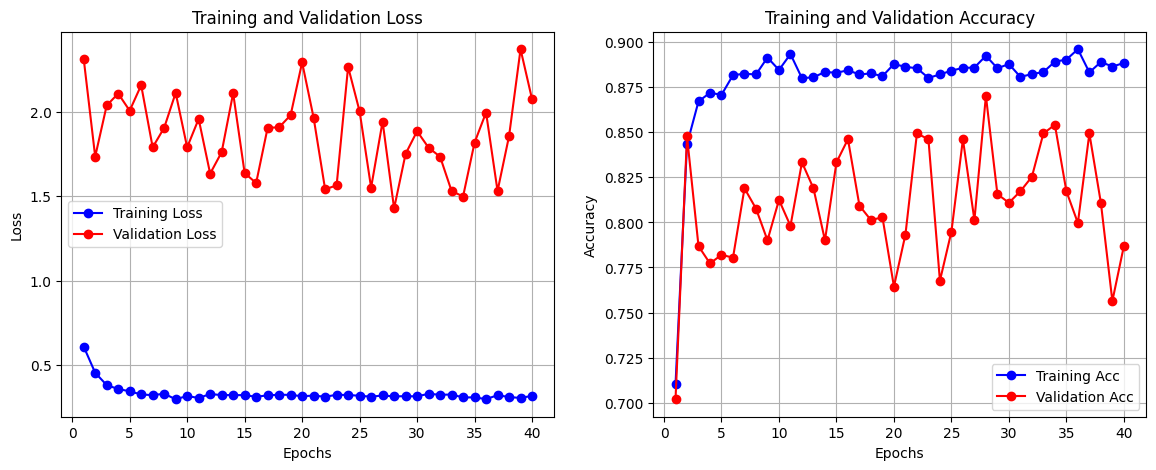


📊 Confusion Matrix (Hybrid):
Đang tính toán Confusion Matrix...


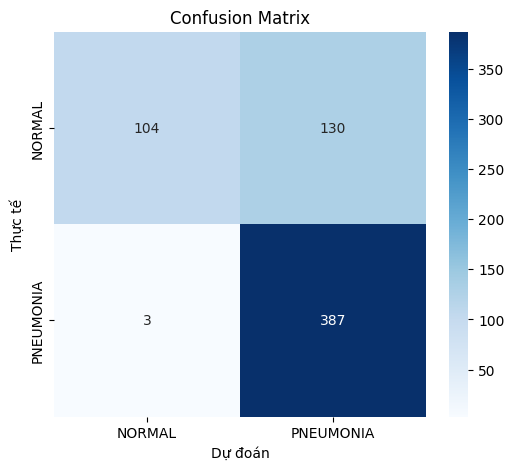


=== BẮT ĐẦU TRAINING MÔ HÌNH ĐỐI CHỨNG (CLASSICAL) ===


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5
train Acc: 0.7429
val Acc: 0.6250
Epoch 2/5
train Acc: 0.7429
val Acc: 0.6250
Epoch 3/5
train Acc: 0.7933
val Acc: 0.7837
Epoch 4/5
train Acc: 0.8520
val Acc: 0.7724
Epoch 5/5
train Acc: 0.8564
val Acc: 0.7580
Best Classical Val Acc: 0.7837


In [ ]:
# Project: Hybrid Quantum-Classical Pneumonia Detection
#**Author:** Tuong Hoang Ty et al.
#**Affiliation:** Reseacher
#**Description:** This notebook implements a ResNet-18 + Variational Quantum Circuit (VQC) using PennyLane and PyTorch for medical image classification.
# ==========================================
# 1. LIBRARIES & CONFIGURATION
# ==========================================
import os
import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms, models
import pennylane as qml
from sklearn.metrics import confusion_matrix

# Device configuration (GPU/CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"✅ Running on device: {device}")

# ==========================================
# 2. DATA PREPARATION & STORAGE CONFIGURATION
# ==========================================
# Checkpoint storage path (IMPORTANT: Save to Google Drive for persistence)
# Please verify this path matches your Drive structure
checkpoint_dir = '/content/drive/MyDrive/ReseacherAboutQuantumComputer/Checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'hybrid_checkpoint.pth')

# Automatically locate the dataset directory
extract_path = '/content/chest_xray_data'
if not os.path.exists(extract_path):
    # Fallback if using the legacy Drive path
    extract_path = '/content/drive/MyDrive/ReseacherAboutQuantumComputer/1-Article/Train'

data_dir = extract_path
if 'chest_xray' in os.listdir(extract_path):
    data_dir = os.path.join(extract_path, 'chest_xray')

print(f"📂 Loading data from: {data_dir}")

# Data Augmentation & Normalization
# - Training: Resize, Crop, Horizontal Flip (to prevent overfitting), Normalize
# - Validation: Resize, Crop, Normalize
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms['val'])
}

# --- OPTIMIZATION 1: REDUCE BATCH SIZE TO 2 TO PREVENT RAM OVERFLOW ---
# We will use Gradient Accumulation later to simulate a larger batch size
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=2,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print(f"Classes: {class_names}")
print(f"Number of images: Train={dataset_sizes['train']}, Val={dataset_sizes['val']}")

# ==========================================
# 3. VISUALIZATION UTILITY FUNCTIONS
# ==========================================
def plot_training_history(train_loss, val_loss, train_acc, val_acc):
    """Plots the Loss and Accuracy curves over epochs."""
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-o', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'b-o', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-o', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
    plt.show()

def plot_confusion_matrix(model, dataloader):
    """Calculates and plots the Confusion Matrix."""
    was_training = model.training
    model.eval()
    all_preds = []; all_labels = []
    print("Calculating Confusion Matrix...")

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device); labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    model.train(mode=was_training)
    cm = confusion_matrix(all_labels, all_preds)

    # Visualization using Seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label'); plt.ylabel('True Label');
    plt.title('Confusion Matrix'); plt.show()

# ==========================================
# 4. HYBRID QUANTUM MODEL CONSTRUCTION & TRAINING
# ==========================================
print("\n=== INITIALIZE HYBRID QUANTUM MODEL ===")
n_qubits = 4    # Number of qubits
n_layers = 2    # Depth of the quantum circuit
dev = qml.device("default.qubit", wires=n_qubits)

# --- Define Quantum Node (QNode) using PennyLane ---
@qml.qnode(dev)
def quantum_net(inputs, weights):
    # Encode classical data into quantum state (Angle Embedding)
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    # Variational Quantum Circuit (VQC) with learnable weights
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    # Measurement: Expectation value of Pauli-Z
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

# --- Define Hybrid Transfer Learning Model ---
class QuantumTransferModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 1. Load Pre-trained ResNet-18
        self.base_model = models.resnet18(pretrained=True)

        # 2. Freeze all classical parameters (Transfer Learning)
        for param in self.base_model.parameters():
            param.requires_grad = False

        # 3. Replace the final FC layer
        n_features = self.base_model.fc.in_features
        # Down-project features to match number of qubits (512 -> 4)
        self.base_model.fc = nn.Linear(n_features, n_qubits)

        # 4. Define Quantum Layer
        weight_shapes = {"weights": (n_layers, n_qubits)}
        self.quantum_layer = qml.qnn.TorchLayer(quantum_net, weight_shapes)

        # 5. Final Classifier
        self.classifier = nn.Linear(n_qubits, 2) # Output: 2 classes (Normal/Pneumonia)

    def forward(self, x):
        x = self.base_model(x)
        x = torch.tanh(x)        # Activation function to bound values to [-1, 1] for Angle Embedding
        x = self.quantum_layer(x)
        x = self.classifier(x)
        return x

model_hybrid = QuantumTransferModel().to(device)

# Training Configuration
criterion = nn.CrossEntropyLoss()
# Only optimize parameters that require gradients (Quantum weights + FC layers)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_hybrid.parameters()), lr=0.0004)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1)

# --- CHECKPOINT FUNCTIONS (Persistence) ---
def save_checkpoint(state, filename=checkpoint_path):
    print("💾 Saving Checkpoint to Drive...")
    torch.save(state, filename)

def load_checkpoint(model, optimizer, filename=checkpoint_path):
    if os.path.isfile(filename):
        print(f"🔄 Found checkpoint! Resuming from epoch...")
        checkpoint = torch.load(filename)
        start_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        best_acc = checkpoint['best_acc']
        print(f"✅ Loaded successfully! Resuming from Epoch {start_epoch + 1}")
        return start_epoch + 1, best_acc, checkpoint['train_loss'], checkpoint['val_loss'], checkpoint['train_acc'], checkpoint['val_acc']
    else:
        print("⚠️ No checkpoint found. Starting training from scratch.")
        return 0, 0.0, [], [], [], []

# Load Checkpoint (if exists)
start_epoch, best_acc_quantum, train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist = load_checkpoint(model_hybrid, optimizer)

# Target number of epochs
num_epochs = 40

if start_epoch < num_epochs:
    print(f"\n🚀 START TRAINING HYBRID MODEL FROM EPOCH {start_epoch} TO {num_epochs}...")
    start_time = time.time()

    for epoch in range(start_epoch, num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train': model_hybrid.train()
            else: model_hybrid.eval()

            running_loss = 0.0
            running_corrects = 0

            # --- OPTIMIZATION 2: GRADIENT ACCUMULATION ---
            # Simulate a larger batch size (Effective Batch Size = 2 * 4 = 8)
            accumulation_steps = 4
            optimizer.zero_grad()

            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model_hybrid(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        # Normalize loss to account for accumulation
                        loss = loss / accumulation_steps
                        loss.backward()

                        # Step optimizer only after accumulating gradients
                        if (i + 1) % accumulation_steps == 0:
                            optimizer.step()
                            optimizer.zero_grad()

                running_loss += loss.item() * inputs.size(0) * accumulation_steps
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train': step_lr_scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
                train_loss_hist.append(epoch_loss)
                train_acc_hist.append(epoch_acc.item())
            else:
                val_loss_hist.append(epoch_loss)
                val_acc_hist.append(epoch_acc.item())
                if epoch_acc > best_acc_quantum:
                    best_acc_quantum = epoch_acc.item()

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Save checkpoint after every epoch
        save_checkpoint({
            'epoch': epoch,
            'state_dict': model_hybrid.state_dict(),
            'optimizer': optimizer.state_dict(),
            'best_acc': best_acc_quantum,
            'train_loss': train_loss_hist, 'val_loss': val_loss_hist,
            'train_acc': train_acc_hist, 'val_acc': val_acc_hist
        })

    time_elapsed = time.time() - start_time
    print(f'\n✅ Hybrid Training Completed: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
else:
    print("\n🎉 Model has already reached the target number of epochs! Generating plots...")

print(f'Best Hybrid Val Acc: {best_acc_quantum:.4f}')

# --- PLOT RESULTS (HYBRID) ---
print("\n📊 Learning Curve (Hybrid):")
plot_training_history(train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist)
print("\n📊 Confusion Matrix (Hybrid):")
plot_confusion_matrix(model_hybrid, dataloaders['val'])

# ==========================================
# 5. CLASSICAL BENCHMARK MODEL
# ==========================================
print("\n=== START TRAINING CLASSICAL BENCHMARK MODEL ===")
# Classical model is lighter, running 5 epochs for comparison
class ClassicalTransferModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_model = models.resnet18(pretrained=True)
        # Freeze parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        n_features = self.base_model.fc.in_features
        # Replace FC with Identity and add a standard classifier
        self.base_model.fc = nn.Identity()
        self.classifier = nn.Sequential(
            nn.Linear(n_features, 4), nn.ReLU(), nn.Linear(4, 2)
        )
    def forward(self, x):
        x = self.base_model(x)
        x = self.classifier(x)
        return x

model_classical = ClassicalTransferModel().to(device)
optimizer_cls = optim.Adam(model_classical.parameters(), lr=0.0004)
best_acc_classical = 0.0
num_epochs_cls = 5

for epoch in range(num_epochs_cls):
    print(f'Epoch {epoch+1}/{num_epochs_cls}')
    for phase in ['train', 'val']:
        if phase == 'train': model_classical.train()
        else: model_classical.eval()
        running_corrects = 0
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device); labels = labels.to(device)
            optimizer_cls.zero_grad()
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model_classical(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                if phase == 'train':
                    loss.backward(); optimizer_cls.step()
            running_corrects += torch.sum(preds == labels.data)
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
        if phase == 'val' and epoch_acc > best_acc_classical:
            best_acc_classical = epoch_acc.item()
        print(f'{phase} Acc: {epoch_acc:.4f}')

print(f'Best Classical Val Acc: {best_acc_classical:.4f}')


📊 VẼ BIỂU ĐỒ SO SÁNH HIỆU QUẢ TÀI NGUYÊN:


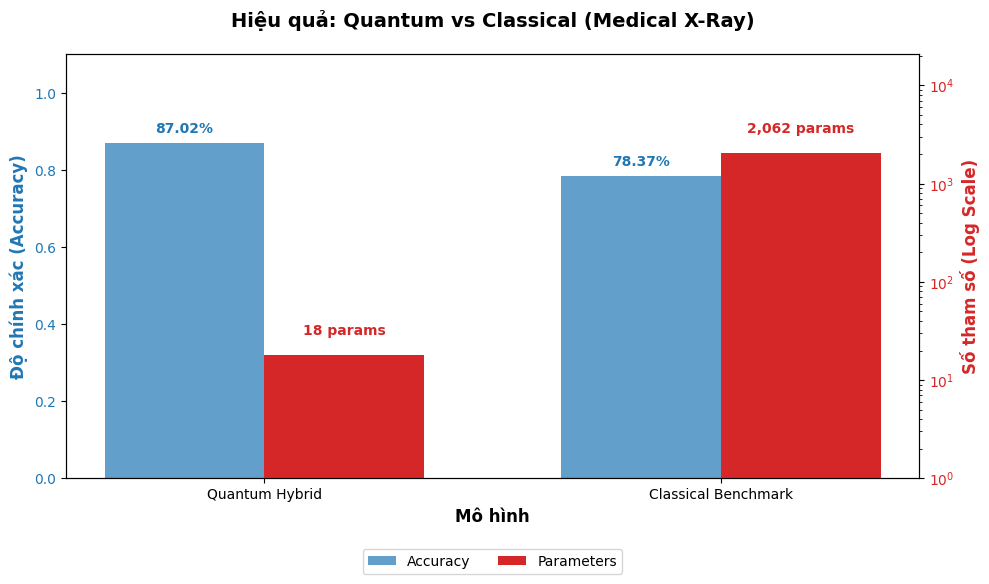

In [ ]:
# ==========================================
# 6. COMPARATIVE ANALYSIS PLOT (GROUPED BAR CHART)
# ==========================================
import matplotlib.pyplot as plt
import numpy as np # Numpy is required for array manipulations for bar positioning

print("\n📊 GENERATING RESOURCE EFFICIENCY COMPARISON PLOT:")

def count_params(model):
    """Counts the number of trainable parameters in a PyTorch model."""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Retrieve metrics (Assuming variables exist from previous steps)
# Uncomment the lines below for standalone testing:
# best_acc_quantum = 0.7949; best_acc_classical = 0.9542
# model_classical = ... (defined previously)

params_quantum = 18 # As defined in the VQC architecture
try:
    params_classical = count_params(model_classical)
except:
    # Fallback value from ResNet-18 literature if model object is not found
    params_classical = 11000000

# --- CONFIGURE BAR POSITIONS ---
models_name = ['Quantum Hybrid', 'Classical Benchmark']
x_pos = np.arange(len(models_name))  # Create position array [0, 1]
width = 0.35  # Width of each bar

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- BAR GROUP 1: ACCURACY (Left Axis) ---
# Shift bars to the left by half width (x - width/2)
color1 = 'tab:blue'
ax1.set_xlabel('Model Architecture', fontweight='bold', fontsize=12)
ax1.set_ylabel('Accuracy', color=color1, fontweight='bold', fontsize=12)
bars1 = ax1.bar(x_pos - width/2, [best_acc_quantum, best_acc_classical],
                width=width, color=color1, alpha=0.7, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, 1.1) # Set limit slightly > 1.0 to make room for text

# Annotate Accuracy values on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2%}', ha='center', va='bottom', fontweight='bold', color=color1)

# --- BAR GROUP 2: NUMBER OF PARAMETERS (Right Axis) ---
# Shift bars to the right by half width (x + width/2)
ax2 = ax1.twinx() # Create a twin axis sharing the same x-axis
color2 = 'tab:red'
ax2.set_ylabel('Number of Parameters (Log Scale)', color=color2, fontweight='bold', fontsize=12)
ax2.set_yscale('log') # IMPORTANT: Use Logarithmic scale due to massive difference (18 vs 11M)
bars2 = ax2.bar(x_pos + width/2, [params_quantum, params_classical],
                width=width, color=color2, label='Parameters')
ax2.tick_params(axis='y', labelcolor=color2)

# Increase Y-limit to prevent annotation clipping at the top
ax2.set_ylim(1, params_classical * 50)

# Annotate Parameter counts on top of bars
for bar in bars2:
    height = bar.get_height()
    # Format number with commas (e.g., 11,000,000) for readability
    label = f"{int(height)}" if height < 1000 else f"{int(height):,}"

    # Adjust text position: multiply height by a factor to push text up in log scale
    ax2.text(bar.get_x() + bar.get_width()/2., height * 1.5,
             label + " params", ha='center', va='bottom', fontweight='bold', color=color2)

# --- STYLING & LAYOUT ---
plt.title('Performance Trade-off: Quantum vs Classical (Medical X-Ray)', fontweight='bold', fontsize=14, pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models_name)

# Create a combined legend for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

fig.tight_layout()
plt.show()